<a href="https://colab.research.google.com/github/pran2681/Zeotap-Assignment/blob/main/Pran_Saikia_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [4]:
print("Customers Dataset:")
print(customers.head())

print("\nProducts Dataset:")
print(products.head())

print("\nTransactions Dataset:")
print(transactions.head())

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166   

In [5]:
print("\nCustomers Info:")
print(customers.info())

print("\nProducts Info:")
print(products.info())

print("\nTransactions Info:")
print(transactions.info())


Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Nul

In [6]:
print("\nMissing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [7]:
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

In [8]:
print("\nDuplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())


Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


In [9]:
print("\nCustomers Statistics:")
print(customers.describe(include='all'))

print("\nProducts Statistics:")
print(products.describe(include='all'))

print("\nTransactions Statistics:")
print(transactions.describe())


Customers Statistics:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00

Products Statistics:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66  

Customer analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns


<ipython-input-11-e44672e911b0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


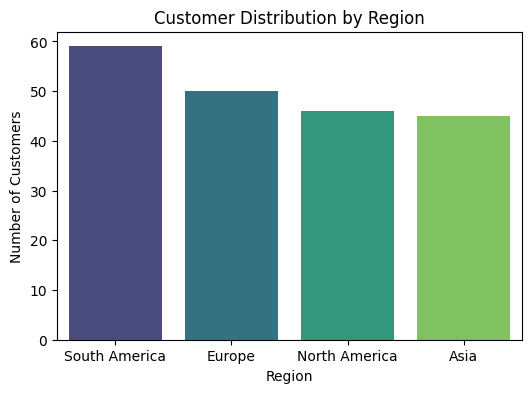

In [11]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title("Customer Distribution by Region")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.show()

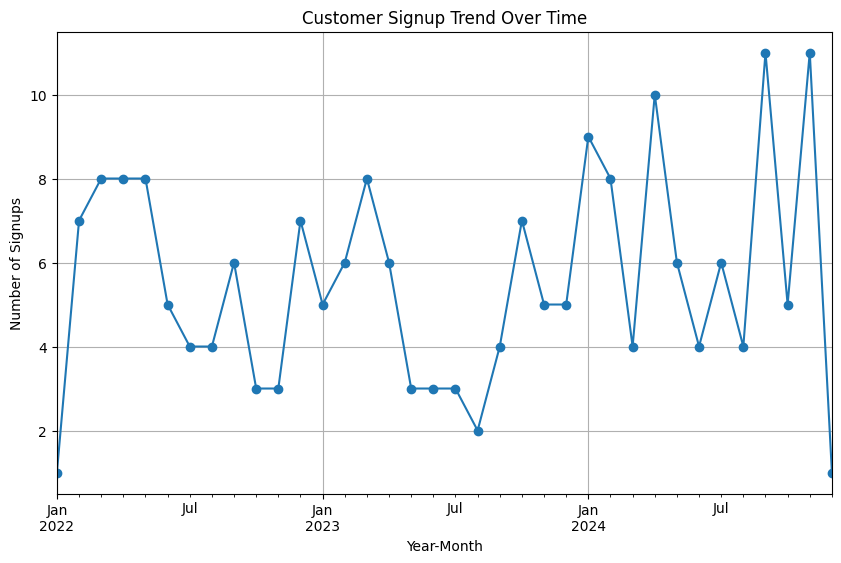

In [12]:
customers['SignupYearMonth'] = customers['SignupDate'].dt.to_period('M')
signup_trend = customers['SignupYearMonth'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
signup_trend.plot(kind='line', marker='o')
plt.title("Customer Signup Trend Over Time")
plt.xlabel("Year-Month")
plt.ylabel("Number of Signups")
plt.grid()
plt.show()

Product Analysis

<ipython-input-13-9a1d23ffd8a2>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')


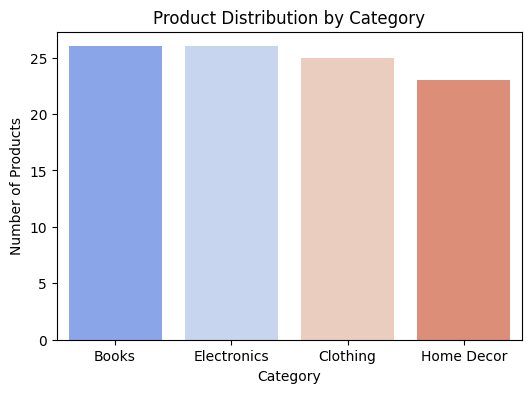

In [13]:
category_counts = products['Category'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='coolwarm')
plt.title("Product Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Products")
plt.show()

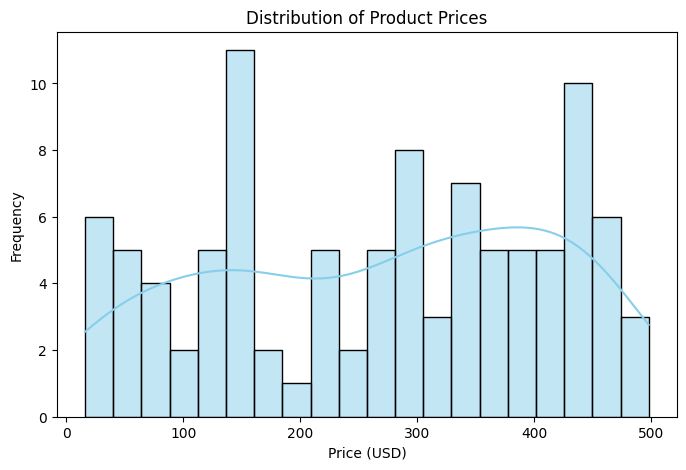

In [14]:
plt.figure(figsize=(8, 5))
sns.histplot(products['Price'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Product Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

Transaction Analysis

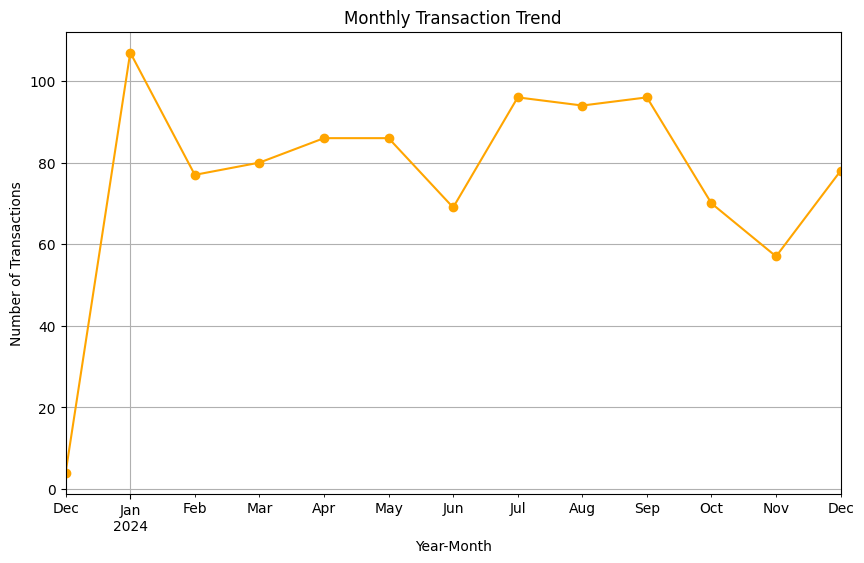

In [15]:
transactions['TransactionYearMonth'] = transactions['TransactionDate'].dt.to_period('M')
transaction_trend = transactions['TransactionYearMonth'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
transaction_trend.plot(kind='line', marker='o', color='orange')
plt.title("Monthly Transaction Trend")
plt.xlabel("Year-Month")
plt.ylabel("Number of Transactions")
plt.grid()
plt.show()

<ipython-input-16-bf3c92a4fe22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_customers.index, y=top_customers.values, palette='magma')


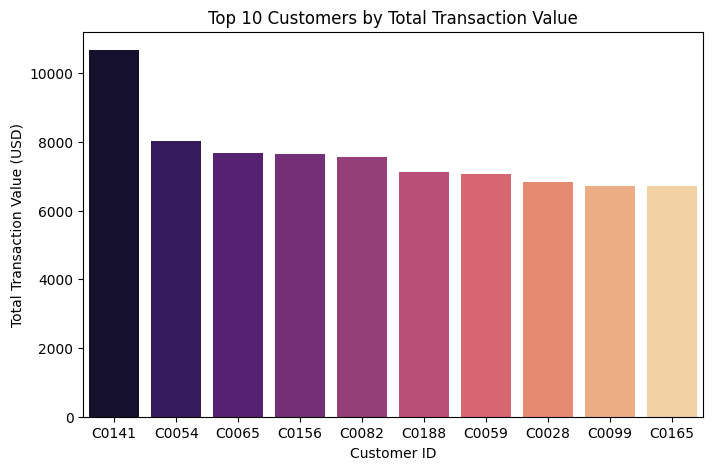

In [16]:
top_customers = transactions.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_customers.index, y=top_customers.values, palette='magma')
plt.title("Top 10 Customers by Total Transaction Value")
plt.xlabel("Customer ID")
plt.ylabel("Total Transaction Value (USD)")
plt.show()


<ipython-input-17-c72865253e6e>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_transaction_by_region.index, y=avg_transaction_by_region.values, palette='cividis')


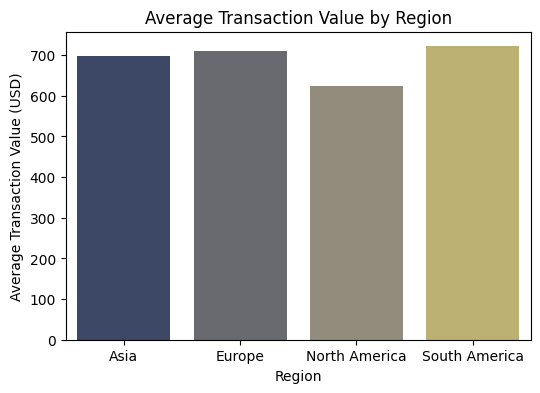

In [17]:
transactions_with_region = transactions.merge(customers, on='CustomerID')
avg_transaction_by_region = transactions_with_region.groupby('Region')['TotalValue'].mean()
plt.figure(figsize=(6, 4))
sns.barplot(x=avg_transaction_by_region.index, y=avg_transaction_by_region.values, palette='cividis')
plt.title("Average Transaction Value by Region")
plt.xlabel("Region")
plt.ylabel("Average Transaction Value (USD)")
plt.show()